In [64]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [66]:
from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline
from rpa.io import open_image
from rpa.features import CGFeatures, create_concrete_feature_cg, create_feature_matching_cg, METHOD_PARAMS

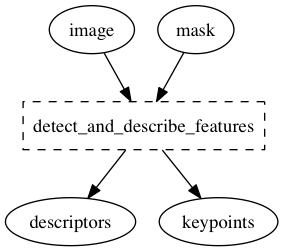

In [67]:
nxpd.draw(CGFeatures().to_networkx())

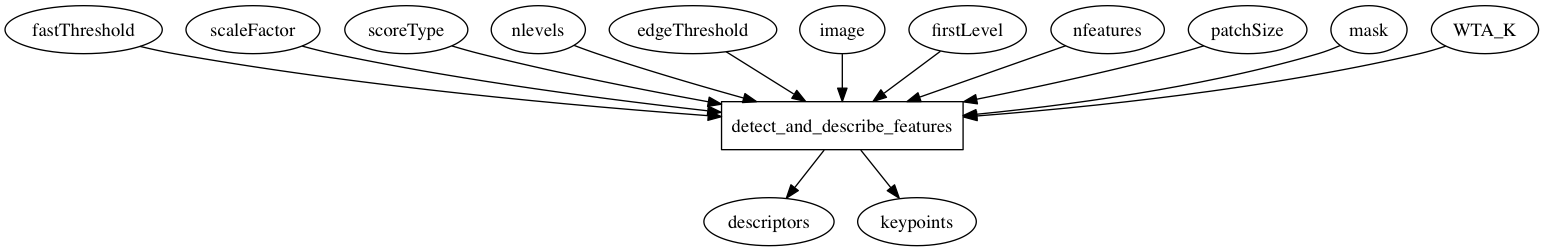

In [81]:
cg_surf = create_concrete_feature_cg('orb')
nxpd.draw(cg_surf.to_networkx())

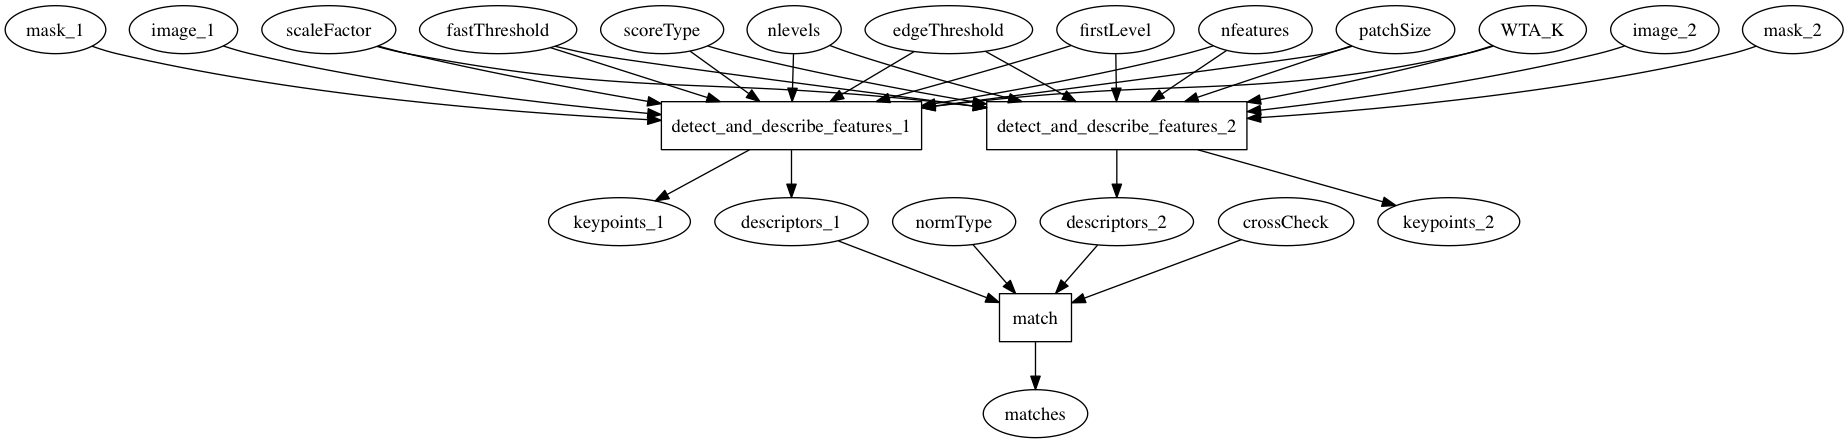

In [82]:
cg_match = create_feature_matching_cg('orb')
nxpd.draw(cg_match.to_networkx())

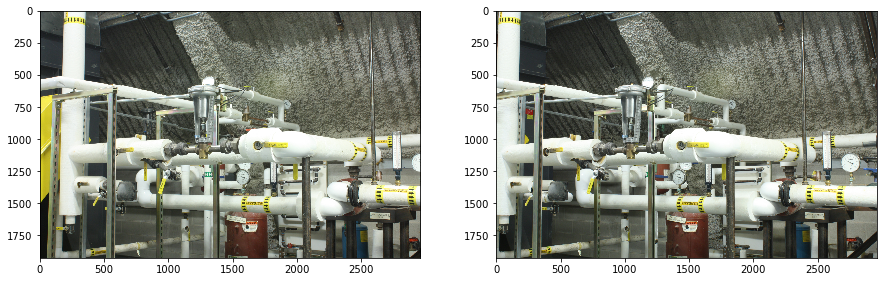

In [83]:
im1 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/pipes/L1/im0e2.png'), gray=False)
im2 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/pipes/L1/im1e2.png'), gray=False)

im_gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im_gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2)

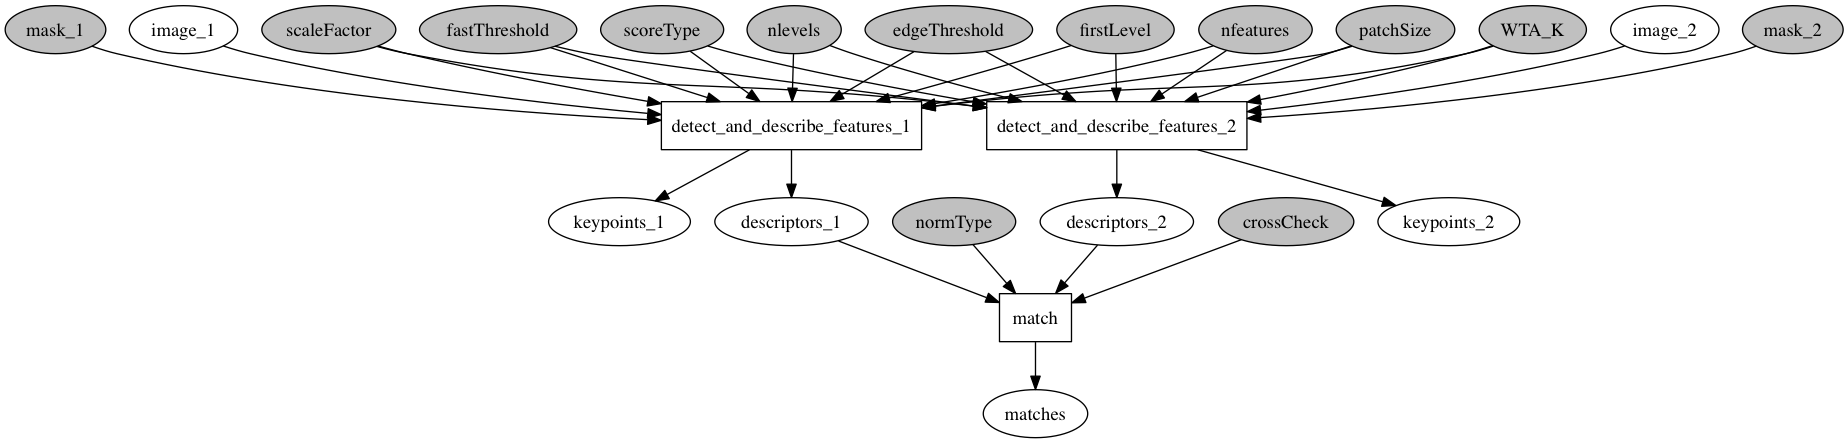

In [84]:
ft = {p: None for p in METHOD_PARAMS['orb']}
ft['mask_1'] = None
ft['mask_2'] = None
ft['normType'] = cv2.NORM_HAMMING
ft['crossCheck'] = True

runner_match = CompGraphRunner(cg_match, frozen_tokens=ft)

nxpd.draw(runner_match.token_manager.to_networkx())

In [86]:
runner_match.run(image_1=im_gray_1, image_2=im_gray_2)

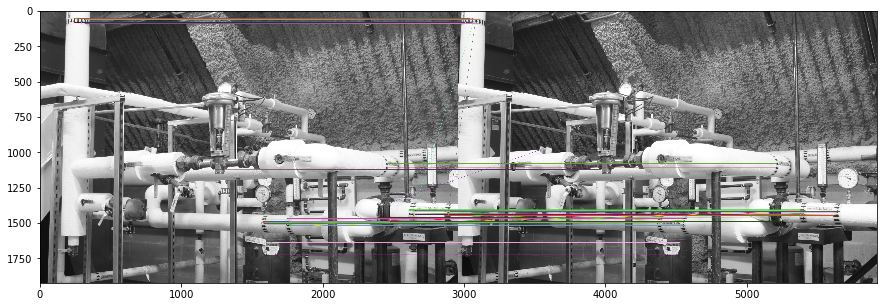

In [92]:
matches = sorted(runner_match['matches'], key=(lambda m : m.distance))
matches_im = cv2.drawMatches(im_gray_1, runner_match['keypoints_1'], im_gray_2, runner_match['keypoints_2'], matches[:200], None, flags=2)

plt.figure(figsize=(15, 10))
plt.imshow(matches_im)